# Data Loading

In [18]:
import pandas as pd

file_path = "Weather Data.csv"

# Read the CSV into a Pandas DataFrame
try:
    df = pd.read_csv(
        file_path,
        encoding='utf-8'
    )
    print("Data imported successfully!")
except UnicodeDecodeError:
    # If UTF-8 fails, try other common encodings
    try:
        df = pd.read_csv(file_path, encoding='latin1')
        print("Data imported with 'latin1' encoding.")
    except Exception as e:
        print(f"Error reading file: {e}")

# Display the first few rows to verify
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

Data imported successfully!

First 5 rows of the DataFrame:
   YEAR  MO  DY  Temperature at 2 Meters ©  Dew/Frost Point at 2 Meters (C)   \
0  2021   1   1                      11.09                             -1.05   
1  2021   1   2                      10.99                              1.71   
2  2021   1   3                      12.78                             10.72   
3  2021   1   4                      14.45                             13.18   
4  2021   1   5                      14.19                             13.42   

   Temperature at 2 Meters Maximum (C)   Temperature at 2 Meters Minimum ©  \
0                                 18.75                               5.82   
1                                 18.87                               5.91   
2                                 17.98                               8.79   
3                                 18.49                              11.69   
4                                 17.01                              

# Data Exploration

In [19]:
# 1. Display the first 5 rows (head)
print("--- First 5 Rows (head()) ---")
print(df.head())

# 2. Display the last 5 rows (tail)
print("\n--- Last 5 Rows (tail()) ---")
print(df.tail())

# 3. Dataset structure (info)
print("\n--- Dataset Structure (info()) ---")
print(df.info())

# 4. Statistical summary (describe)
print("\n--- Statistical Summary (describe()) ---")
print(df.describe())

# 5. Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 6. Unique values in categorical columns (if any)
print("\n--- Unique Values in 'YEAR' ---")
print(df['YEAR'].unique())

--- First 5 Rows (head()) ---
   YEAR  MO  DY  Temperature at 2 Meters ©  Dew/Frost Point at 2 Meters (C)   \
0  2021   1   1                      11.09                             -1.05   
1  2021   1   2                      10.99                              1.71   
2  2021   1   3                      12.78                             10.72   
3  2021   1   4                      14.45                             13.18   
4  2021   1   5                      14.19                             13.42   

   Temperature at 2 Meters Maximum (C)   Temperature at 2 Meters Minimum ©  \
0                                 18.75                               5.82   
1                                 18.87                               5.91   
2                                 17.98                               8.79   
3                                 18.49                              11.69   
4                                 17.01                              11.78   

   Specific Humidity

Handling Missing Data

In [20]:
# Check missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Strategy: Fill numeric columns with median, categorical with mode
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
YEAR                                    0
MO                                      0
DY                                      0
Temperature at 2 Meters ©               0
Dew/Frost Point at 2 Meters (C)         0
Temperature at 2 Meters Maximum (C)     0
Temperature at 2 Meters Minimum ©       0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Precipitation Corrected (mm/day)        0
Wind Speed at 10 Meters                 0
dtype: int64

Missing values after handling:
YEAR                                    0
MO                                      0
DY                                      0
Temperature at 2 Meters ©               0
Dew/Frost Point at 2 Meters (C)         0
Temperature at 2 Meters Maximum (C)     0
Temperature at 2 Meters Minimum ©       0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Precipitation Corrected (mm/day)        0
Wind Speed at 10 Meters                 0

<ipython-input-20-434caf4c2c79>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


# Data Cleaning

Removing Duplicates

In [21]:
# Check duplicates
print(f"\nNumber of duplicates: {df.duplicated().sum()}")

# Remove duplicates (keeping the first occurrence)
df.drop_duplicates(inplace=True)

# Verify removal
print(f"Duplicates after removal: {df.duplicated().sum()}")


Number of duplicates: 0
Duplicates after removal: 0


Handling Outliers (used IQR method)

In [22]:
from scipy import stats
import numpy as np

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply to numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df = handle_outliers_iqr(df, col)

print("\nOutliers capped using IQR method.")


Outliers capped using IQR method.


# Data Transformation

Data Type Conversion

In [23]:
# Use the EXACT column names from your dataset
numeric_cols = [
    'Temperature at 2 Meters ©',
    'Dew/Frost Point at 2 Meters (C) ',
    'Temperature at 2 Meters Maximum (C) ',
    'Temperature at 2 Meters Minimum ©',
    'Specific Humidity at 2 Meters (g/kg)',
    'Relative Humidity at 2 Meters (%)',
    'Precipitation Corrected (mm/day)',
    'Wind Speed at 10 Meters'
]

# Convert to numeric (handles errors by coercing to NaN)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for missing values (from coercion)
print("\nMissing values after conversion:")
print(df[numeric_cols].isnull().sum())


Missing values after conversion:
Temperature at 2 Meters ©               0
Dew/Frost Point at 2 Meters (C)         0
Temperature at 2 Meters Maximum (C)     0
Temperature at 2 Meters Minimum ©       0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Precipitation Corrected (mm/day)        0
Wind Speed at 10 Meters                 0
dtype: int64


Categorical Encoding (label encoding done)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Example: If 'MO' (month) needs ordinal encoding
le = LabelEncoder()
df['MO_encoded'] = le.fit_transform(df['MO'])  # Creates new column
print("\n--- Label Encoding for Months ---")
print(df[['MO', 'MO_encoded']].head())


--- Label Encoding for Months ---
    MO  MO_encoded
0  1.0           0
1  1.0           0
2  1.0           0
3  1.0           0
4  1.0           0


Feature Scaling (min max scaling)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\n--- Min-Max Scaled Numerical Features ---")
print(df[numeric_cols].head())


--- Min-Max Scaled Numerical Features ---
   Temperature at 2 Meters ©  Dew/Frost Point at 2 Meters (C)   \
0                   0.107511                          0.133742   
1                   0.104482                          0.218405   
2                   0.158692                          0.494785   
3                   0.209267                          0.570245   
4                   0.201393                          0.577607   

   Temperature at 2 Meters Maximum (C)   Temperature at 2 Meters Minimum ©  \
0                              0.144748                           0.165713   
1                              0.148279                           0.168424   
2                              0.122095                           0.255197   
3                              0.137099                           0.342573   
4                              0.093557                           0.345285   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0            

## Phase 2: Exploratory Data Analysis (EDA)

# Univariate Analysis

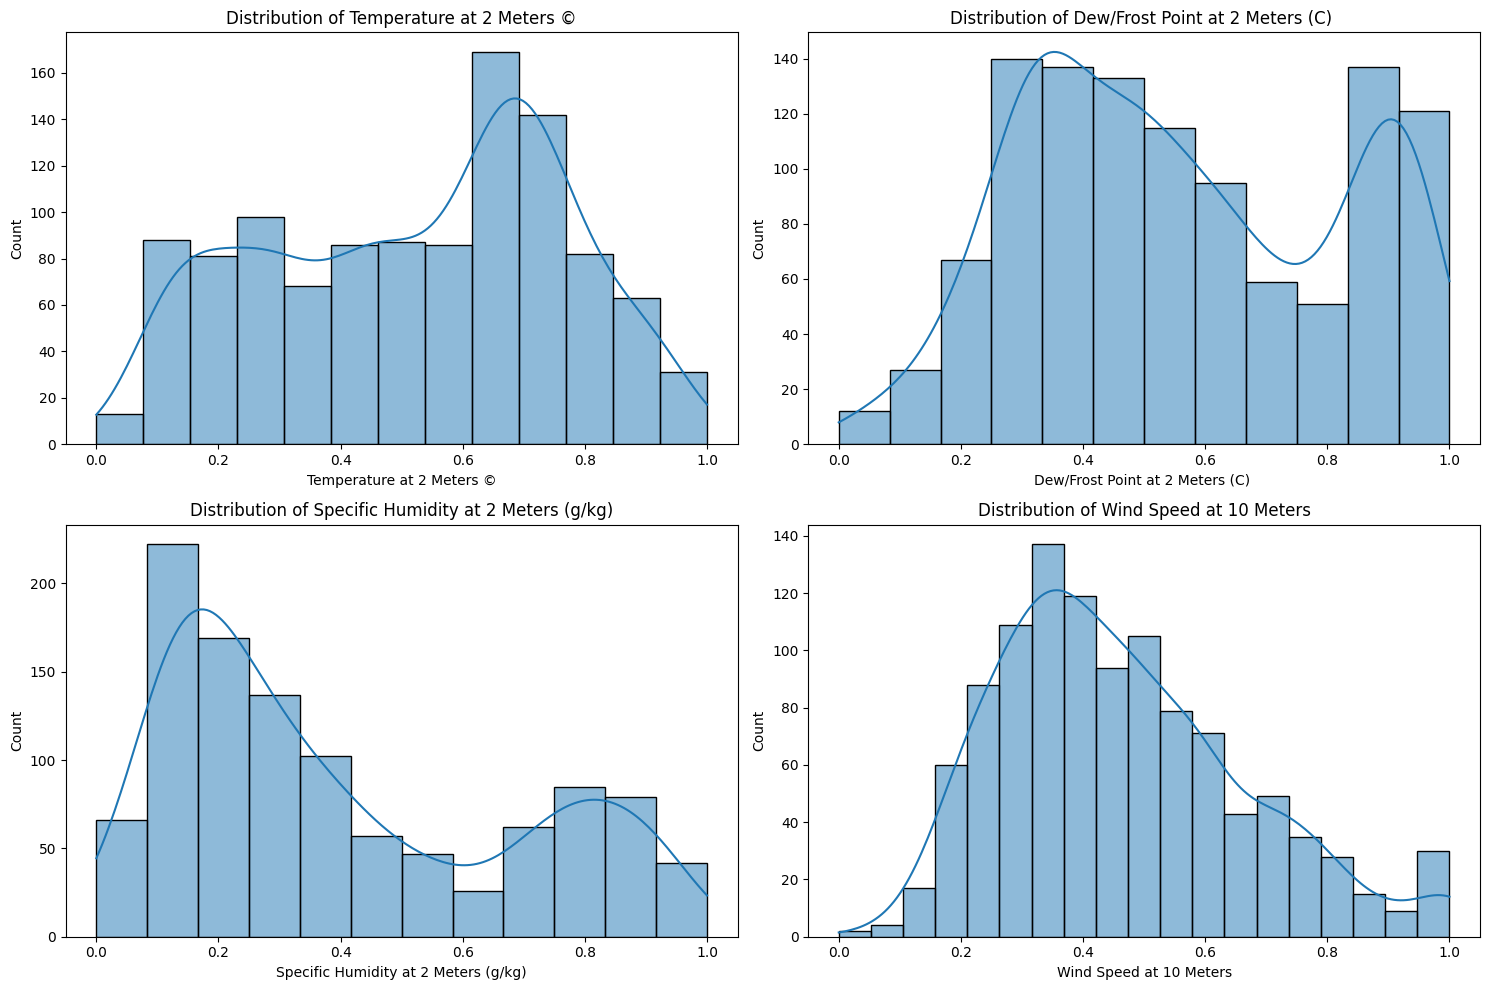

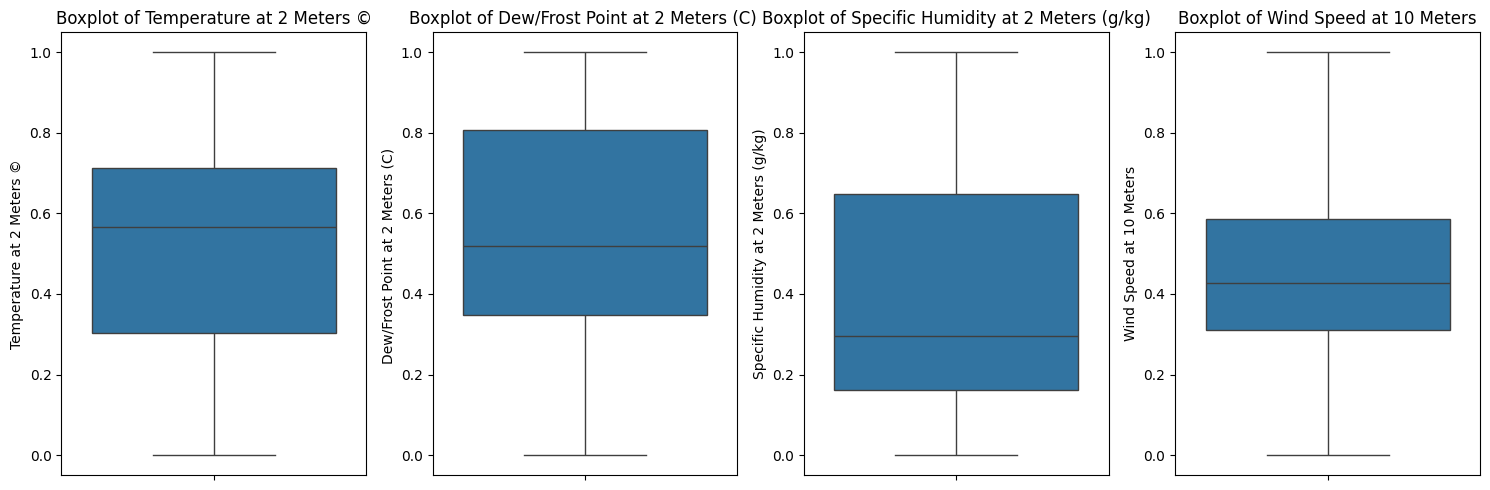

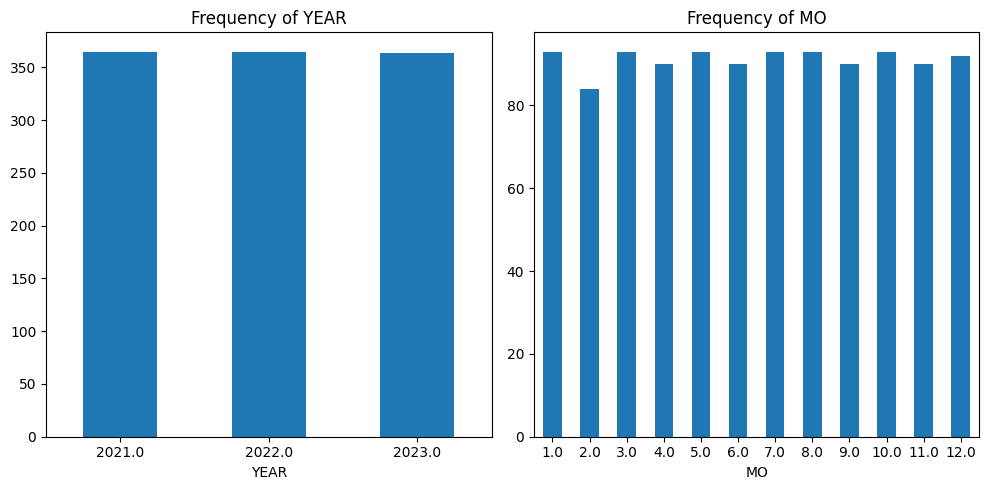

Statistical Summary:
       Temperature at 2 Meters ©  Dew/Frost Point at 2 Meters (C)   \
count                1094.000000                       1094.000000   
mean                    0.523191                          0.558250   
std                     0.244427                          0.252290   
min                     0.000000                          0.000000   
25%                     0.303528                          0.346933   
50%                     0.567535                          0.519785   
75%                     0.711993                          0.808282   
max                     1.000000                          1.000000   

       Specific Humidity at 2 Meters (g/kg)  Wind Speed at 10 Meters  
count                           1094.000000              1094.000000  
mean                               0.394828                 0.461802  
std                                0.278485                 0.201501  
min                                0.000000                 0.00

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    'Temperature at 2 Meters ©',
    'Dew/Frost Point at 2 Meters (C) ',
    'Specific Humidity at 2 Meters (g/kg)',
    'Wind Speed at 10 Meters'
]

categorical_cols = ['YEAR', 'MO']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("Statistical Summary:")
print(df[numeric_cols].describe())

# Bivariate and Multivariate Analysis

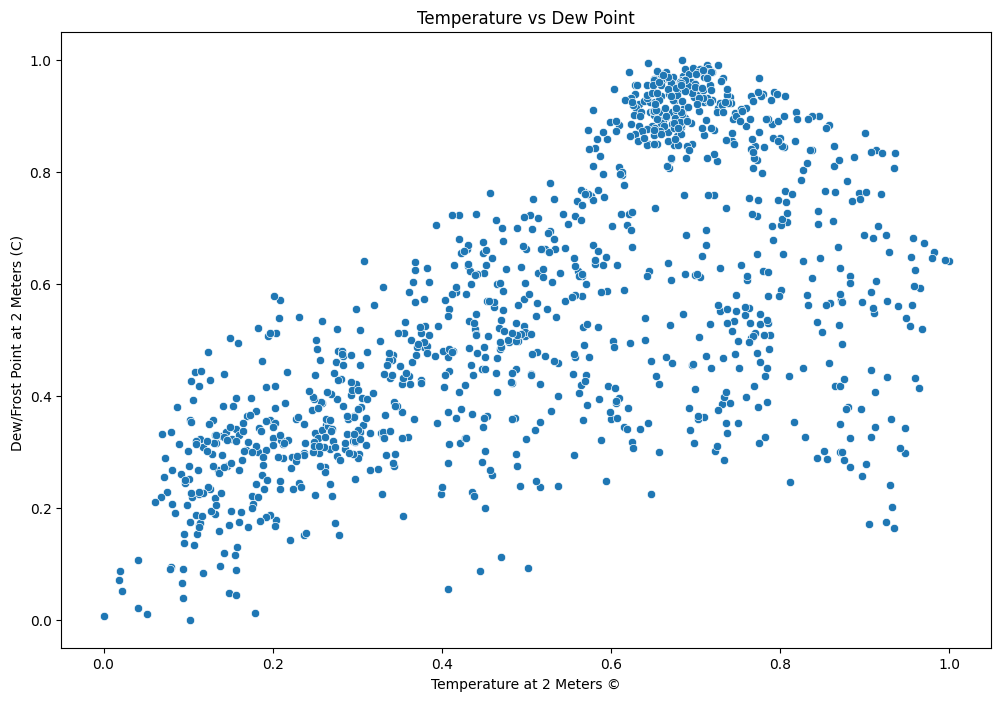

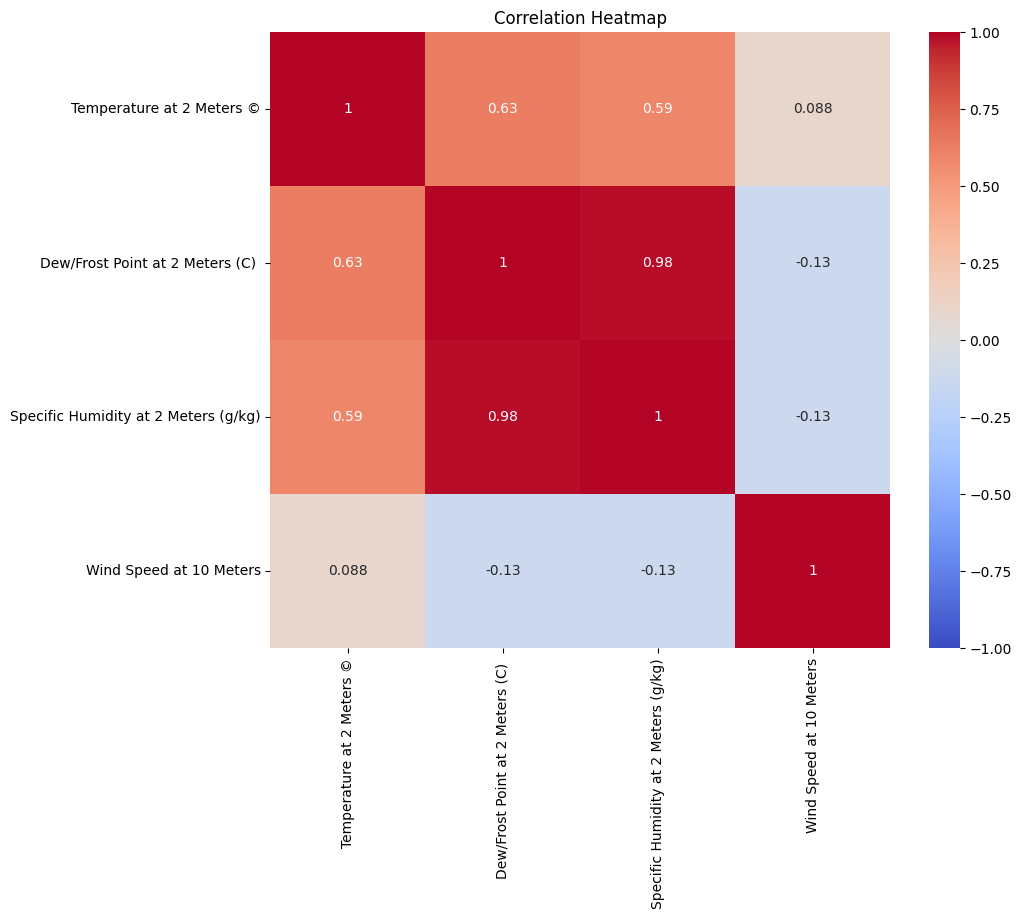

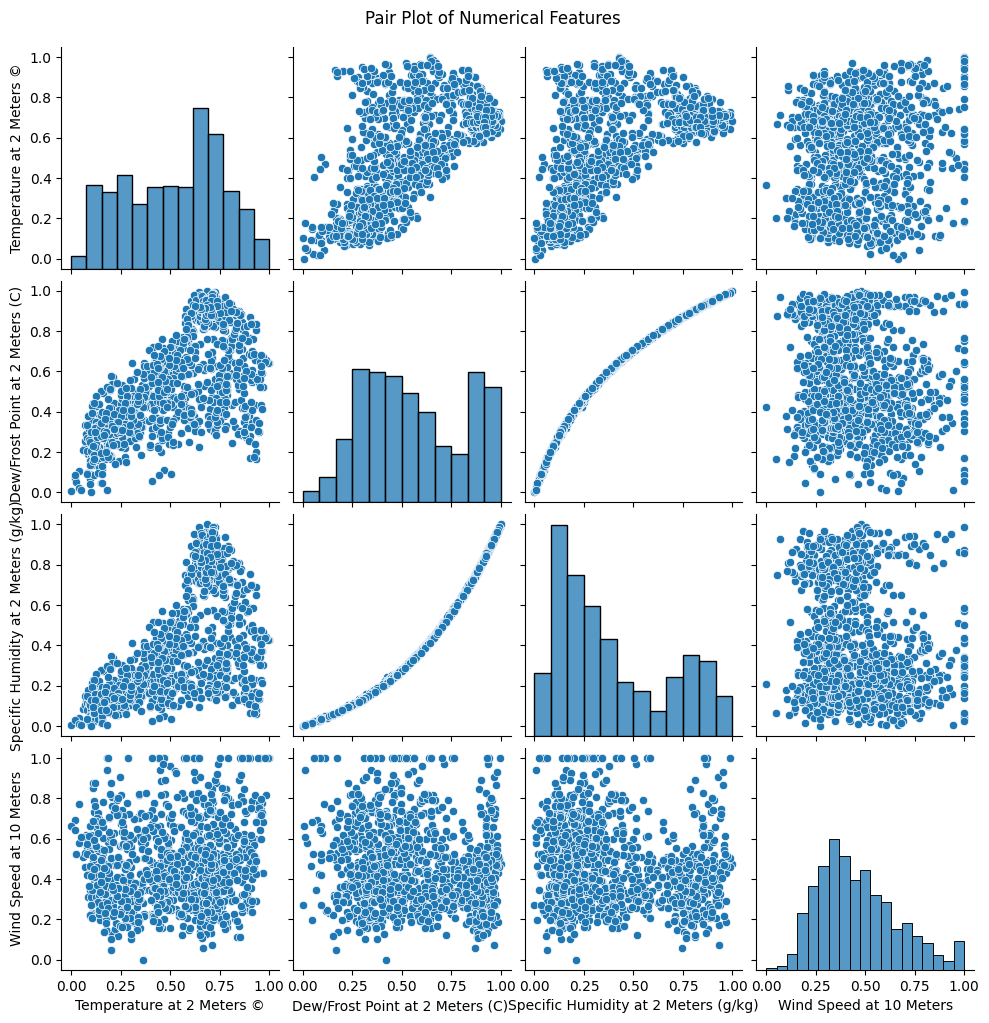

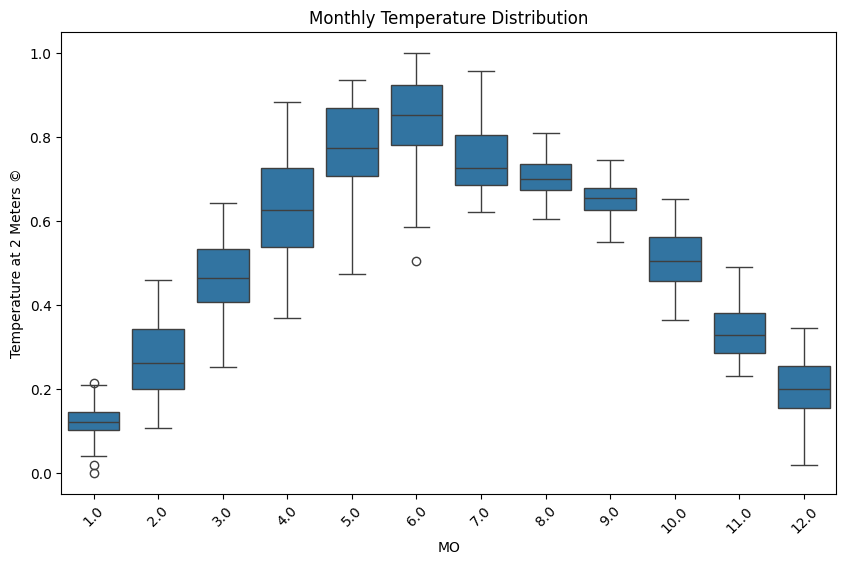

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperature at 2 Meters ©', y='Dew/Frost Point at 2 Meters (C) ')
plt.title('Temperature vs Dew Point')
plt.show()

plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df[numeric_cols[:4]])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MO', y='Temperature at 2 Meters ©')
plt.title('Monthly Temperature Distribution')
plt.xticks(rotation=45)
plt.show()

# Feature Analysis

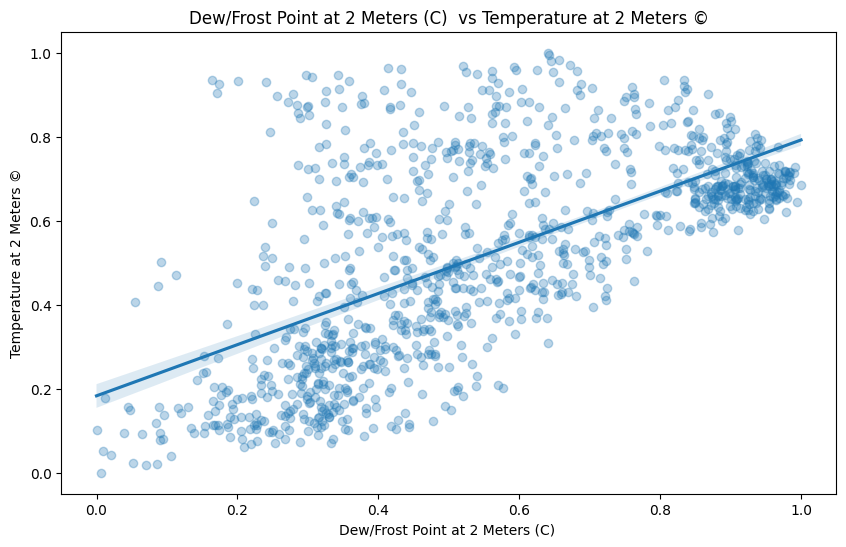

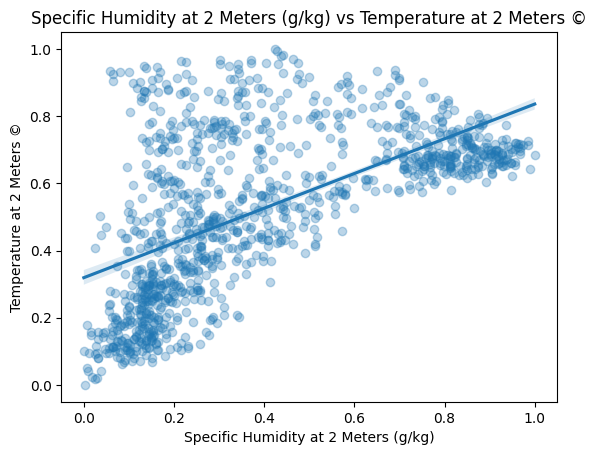

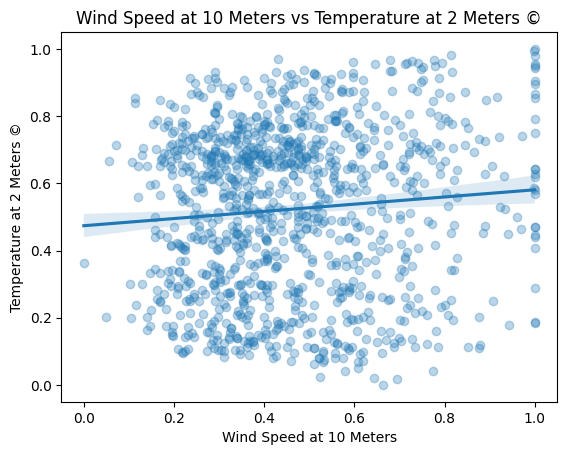


Correlation with Target:
Dew/Frost Point at 2 Meters (C)         0.628818
Specific Humidity at 2 Meters (g/kg)    0.588716
Wind Speed at 10 Meters                 0.088176
Name: Temperature at 2 Meters ©, dtype: float64


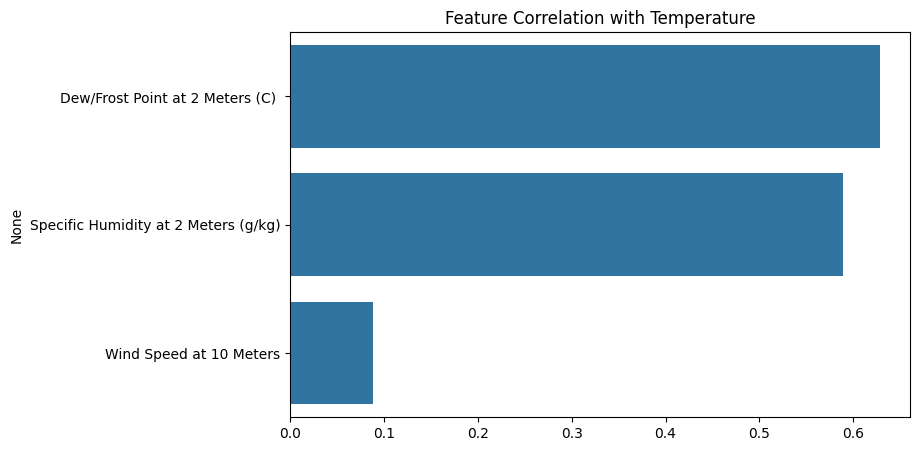

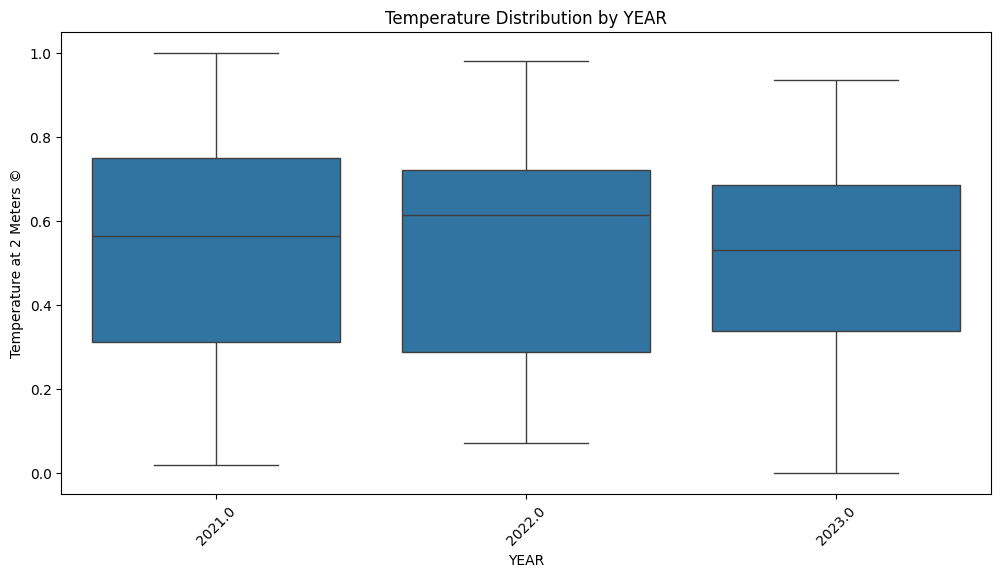


YEAR Group Statistics:
            mean    median       std
YEAR                                
2021.0  0.530126  0.564204  0.256502
2022.0  0.537654  0.613568  0.254194
2023.0  0.501735  0.530285  0.220009


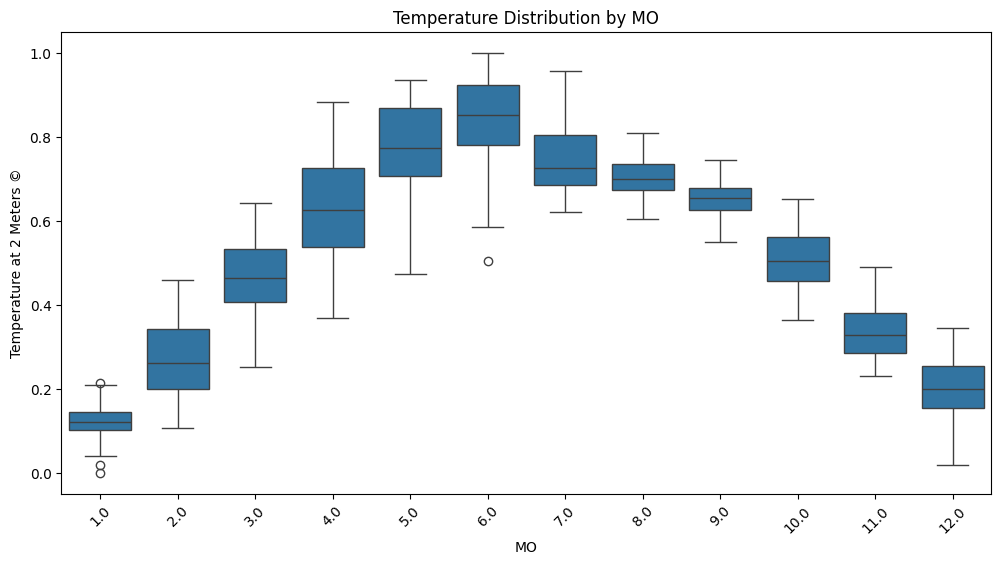


MO Group Statistics:
          mean    median       std
MO                                
1.0   0.124047  0.122350  0.042356
2.0   0.276211  0.262568  0.094968
3.0   0.466980  0.465173  0.089705
4.0   0.627347  0.625984  0.117221
5.0   0.768127  0.773168  0.108633
6.0   0.843331  0.851757  0.098613
7.0   0.752128  0.726832  0.088276
8.0   0.707199  0.700787  0.046661
9.0   0.651841  0.654300  0.040382
10.0  0.505728  0.505451  0.070103
11.0  0.338189  0.328437  0.063689
12.0  0.201679  0.198819  0.070444


In [28]:
# Set target variable (example: temperature)
target = 'Temperature at 2 Meters ©'
features = [col for col in numeric_cols if col != target]

plt.figure(figsize=(10, 6))
for feature in features:
    sns.regplot(data=df, x=feature, y=target, scatter_kws={'alpha':0.3})
    plt.title(f'{feature} vs {target}')
    plt.show()

correlation_with_target = df[numeric_cols].corr()[target].sort_values(ascending=False)
print("\nCorrelation with Target:")
print(correlation_with_target[1:])  # Exclude self-correlation

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_target[1:].values, y=correlation_with_target[1:].index)
plt.title('Feature Correlation with Temperature')
plt.show()

for cat_col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=cat_col, y=target)
    plt.title(f'Temperature Distribution by {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

    group_stats = df.groupby(cat_col)[target].agg(['mean', 'median', 'std'])
    print(f"\n{cat_col} Group Statistics:")
    print(group_stats)

In [29]:
df.head()

,YEAR,MO,DY,Temperature at 2 Meters ©,Dew/Frost Point at 2 Meters (C),Temperature at 2 Meters Maximum (C),Temperature at 2 Meters Minimum ©,Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Precipitation Corrected (mm/day),Wind Speed at 10 Meters,MO_encoded
0,2021.0,1.0,1.0,0.107511,0.133742,0.144748,0.165713,0.047366,0.414914,0.000000,0.230254,0
1,2021.0,1.0,2.0,0.104482,0.218405,0.148279,0.168424,0.094732,0.544881,0.136952,0.334672,0
2,2021.0,1.0,3.0,0.158692,0.494785,0.122095,0.255197,0.271629,0.913862,0.514405,0.530120,0
3,2021.0,1.0,4.0,0.209267,0.570245,0.137099,0.342573,0.339294,0.965638,1.000000,0.484605,0
4,2021.0,1.0,5.0,0.201393,0.577607,0.093557,0.345285,0.345094,1.000000,1.000000,0.875502,0


#Stacking Regressor with base learners: XGBoost, Random Forest, Ridge, SVR, KNN and final estimator Ridge.


Stacking Regressor Results:
Test RMSE: 0.2047
Test MAE: 0.1349
Train R²: 0.8448
Test R²: 0.7775


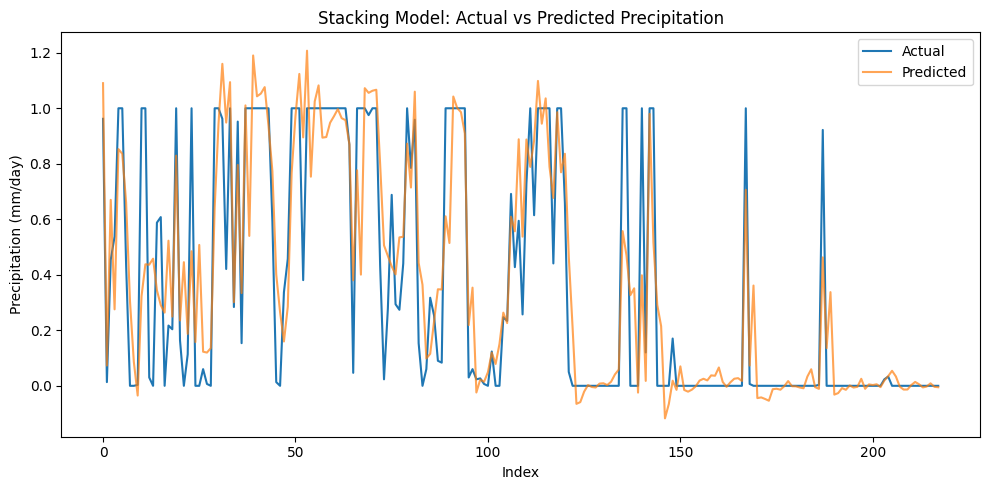


✅ Model and feature list saved to your local directory as 'stacking_model.pkl' and 'features_list.pkl'.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import joblib  # for saving the model

# --- Data Cleaning and Feature Engineering ---

df.columns = df.columns.str.replace('©', '(C)', regex=False).str.strip()

df['MO_sin'] = np.sin(2 * np.pi * df['MO'] / 12)
df['MO_cos'] = np.cos(2 * np.pi * df['MO'] / 12)

df['Temp_Dew_Spread'] = df['Temperature at 2 Meters (C)'] - df['Dew/Frost Point at 2 Meters (C)']
df['Humidity_Temp_Interaction'] = df['Relative Humidity at 2 Meters (%)'] * df['Temperature at 2 Meters (C)']
df['log_precipitation'] = np.log1p(df['Precipitation Corrected (mm/day)'])

df['precip_lag1'] = df['log_precipitation'].shift(1)
df['precip_roll3'] = df['log_precipitation'].rolling(3).mean()
df['precip_roll7'] = df['log_precipitation'].rolling(7).mean()
df.dropna(inplace=True)

features = [
    'MO_sin', 'MO_cos',
    'Temperature at 2 Meters (C)', 'Dew/Frost Point at 2 Meters (C)',
    'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)',
    'Wind Speed at 10 Meters', 'Temp_Dew_Spread',
    'Humidity_Temp_Interaction', 'precip_lag1', 'precip_roll3', 'precip_roll7'
]

X = df[features]
y = df['log_precipitation']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# --- Base Models ---
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
ridge = Ridge(alpha=1.0)
svr = SVR(kernel='rbf', C=1.0)
knn = KNeighborsRegressor(n_neighbors=5)

# --- Stacking Regressor ---
stacking = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('ridge', ridge),
        ('svr', svr),
        ('knn', knn)
    ],
    final_estimator=Ridge(),
    cv=3,
    n_jobs=-1,
    passthrough=True
)

stacking.fit(X_train, y_train)
y_pred_log = stacking.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mae = mean_absolute_error(y_test_orig, y_pred)
r2_train = r2_score(np.expm1(y_train), np.expm1(stacking.predict(X_train)))
r2_test = r2_score(y_test_orig, y_pred)

print(f"\nStacking Regressor Results:")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(10, 5))
plt.plot(y_test_orig.values, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Stacking Model: Actual vs Predicted Precipitation')
plt.xlabel('Index')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.tight_layout()
plt.savefig('stacking_actual_vs_predicted.png')
plt.show()

# --- Save the model and feature list locally ---
joblib.dump(stacking, 'stacking_model.pkl')
joblib.dump(features, 'features_list.pkl')

print("\n✅ Model and feature list saved to your local directory as 'stacking_model.pkl' and 'features_list.pkl'.")



--- Extended Evaluation Metrics ---
Test RMSE: 0.2047
Test MAE: 0.1349
Test MAPE (raw): 146800179332659.3125
Test MAPE (filtered): 0.3292
SMAPE: 115.7734
MSLE: 0.0199
Max Error: 0.6771
Test Median AE: 0.0653
Explained Variance Score: 0.7793
Train R²: 0.8448
Test R²: 0.7775


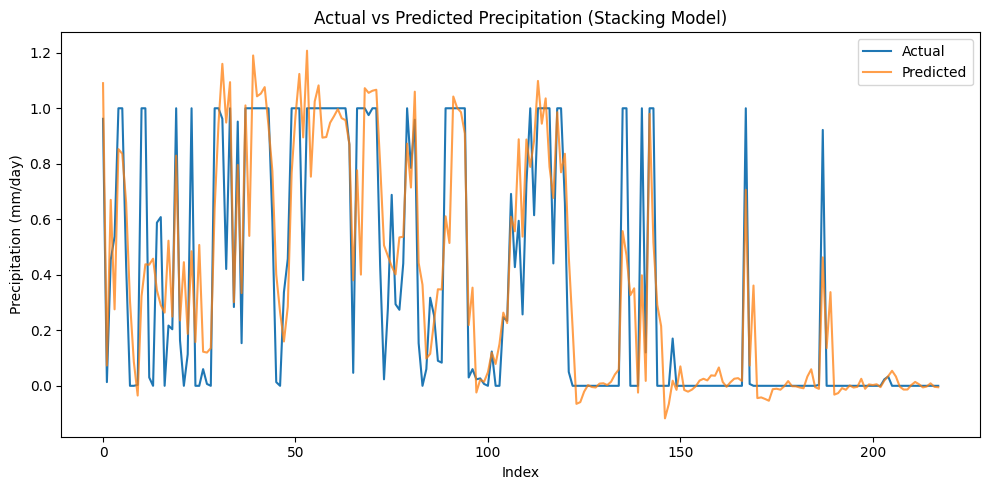

Feature importance not available from the stacking model.


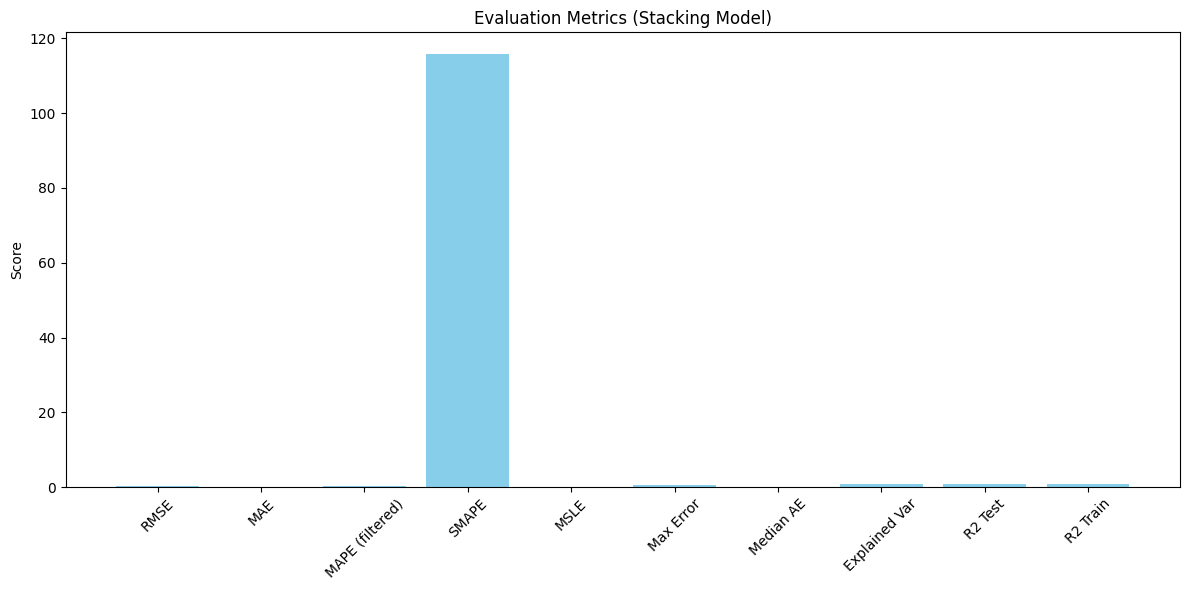

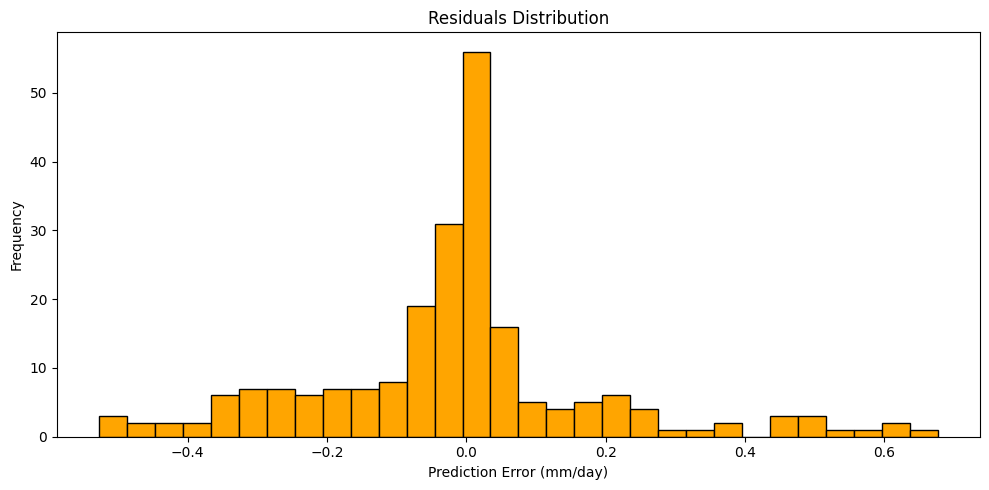

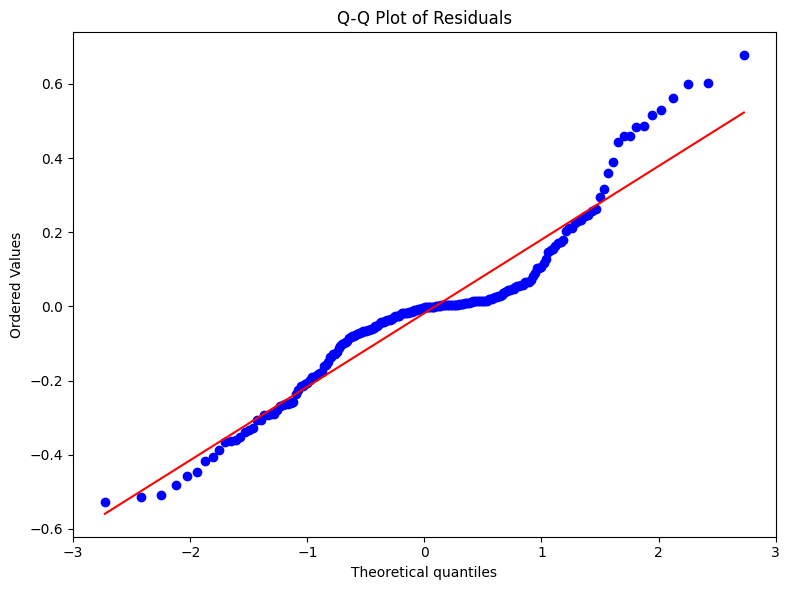

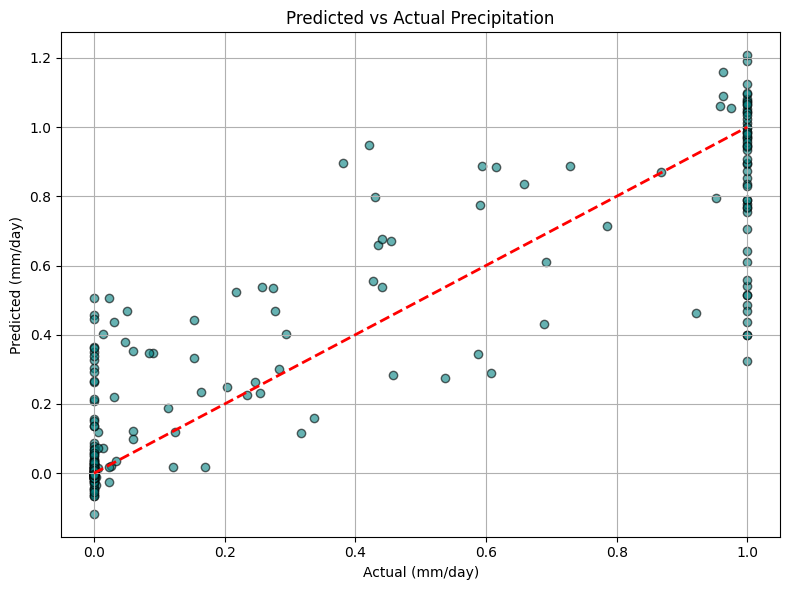

In [31]:
from sklearn.metrics import (
    mean_absolute_percentage_error, median_absolute_error, explained_variance_score,
    mean_squared_log_error, max_error
)
import scipy.stats as stats

# --- Additional Evaluation Metrics ---
mape = mean_absolute_percentage_error(y_test_orig, y_pred)

# Filtered MAPE: Avoid division by near-zero values
mask = y_test_orig > 0.1
filtered_mape = mean_absolute_percentage_error(y_test_orig[mask], y_pred[mask])

# SMAPE (Symmetric MAPE)
smape = 100 * np.mean(2 * np.abs(y_pred - y_test_orig) / (np.abs(y_pred) + np.abs(y_test_orig)))

# MSLE (requires non-negative)
y_test_clip = np.clip(y_test_orig, 0, None)
y_pred_clip = np.clip(y_pred, 0, None)
msle = mean_squared_log_error(y_test_clip, y_pred_clip)

max_err = max_error(y_test_orig, y_pred)
medae = median_absolute_error(y_test_orig, y_pred)
explained_var = explained_variance_score(y_test_orig, y_pred)

# --- Print All Metrics ---
print(f"\n--- Extended Evaluation Metrics ---")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test MAPE (raw): {mape:.4f}")
print(f"Test MAPE (filtered): {filtered_mape:.4f}")
print(f"SMAPE: {smape:.4f}")
print(f"MSLE: {msle:.4f}")
print(f"Max Error: {max_err:.4f}")
print(f"Test Median AE: {medae:.4f}")
print(f"Explained Variance Score: {explained_var:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(10, 5))
plt.plot(y_test_orig.values, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.75)
plt.title('Actual vs Predicted Precipitation (Stacking Model)')
plt.xlabel('Index')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional Feature Importance (from XGBoost base model) ---
try:
    importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    importances.plot(kind='bar')
    plt.title('Feature Importance (XGBoost Base Model)')
    plt.tight_layout()
    plt.show()
except:
    print("Feature importance not available from the stacking model.")

# --- Evaluation Metrics Bar Chart ---
metrics = {
    "RMSE": rmse,
    "MAE": mae,
    "MAPE (filtered)": filtered_mape,
    "SMAPE": smape,
    "MSLE": msle,
    "Max Error": max_err,
    "Median AE": medae,
    "Explained Var": explained_var,
    "R2 Test": r2_test,
    "R2 Train": r2_train
}

plt.figure(figsize=(12, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("Evaluation Metrics (Stacking Model)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Residual Plot ---
residuals = y_test_orig - y_pred

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error (mm/day)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Q-Q Plot of Residuals ---
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# --- Scatter: Predicted vs Actual ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Precipitation')
plt.xlabel('Actual (mm/day)')
plt.ylabel('Predicted (mm/day)')
plt.grid(True)
plt.tight_layout()
plt.show()


#Multilayer Perceptron (MLP) also called feedforward neural network (FNN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test RMSE: 0.1894
Test MAE: 0.1021
Test MAPE (raw): 73589577785571.5156
Test MAPE (filtered): 0.3622
SMAPE: 122.9888
MSLE: 0.0163
Max Error: 0.9821
Test Median AE: 0.0351
Explained Variance Score: 0.7847
Train R²: 0.8800
Test R²: 0.7837


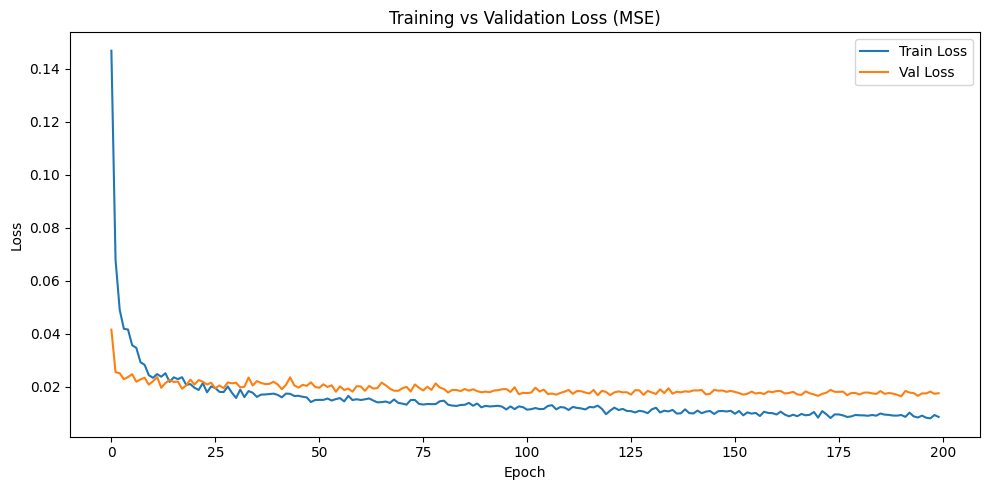

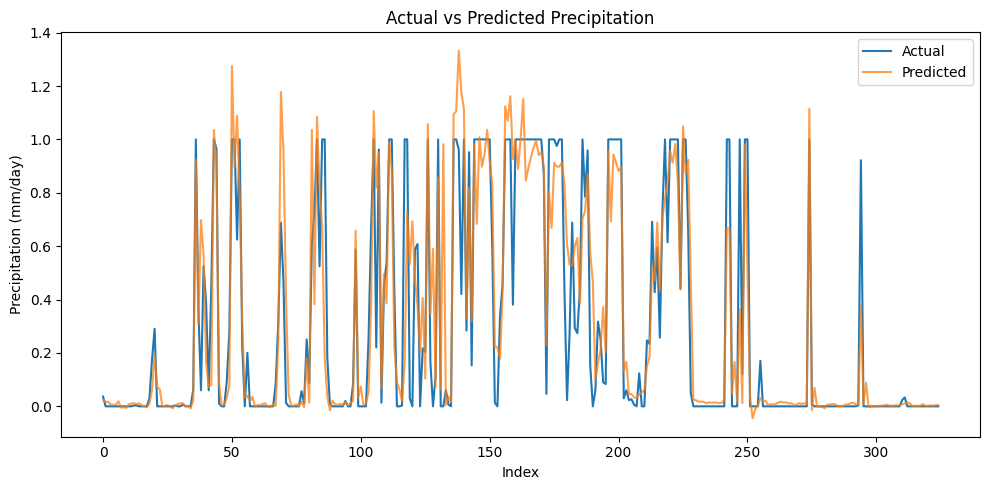

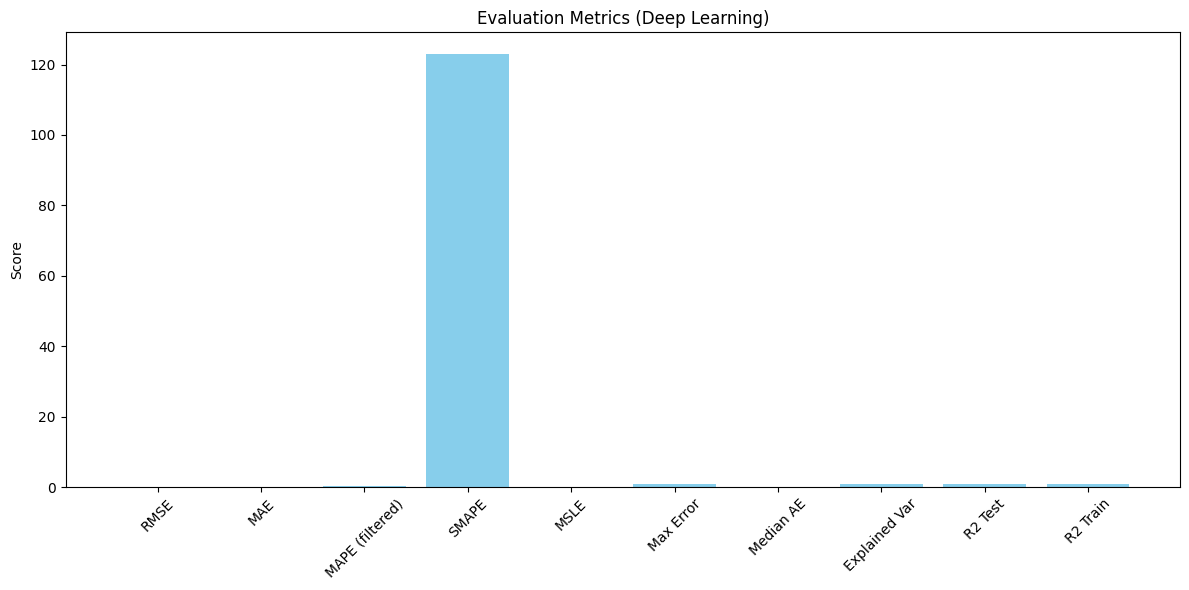

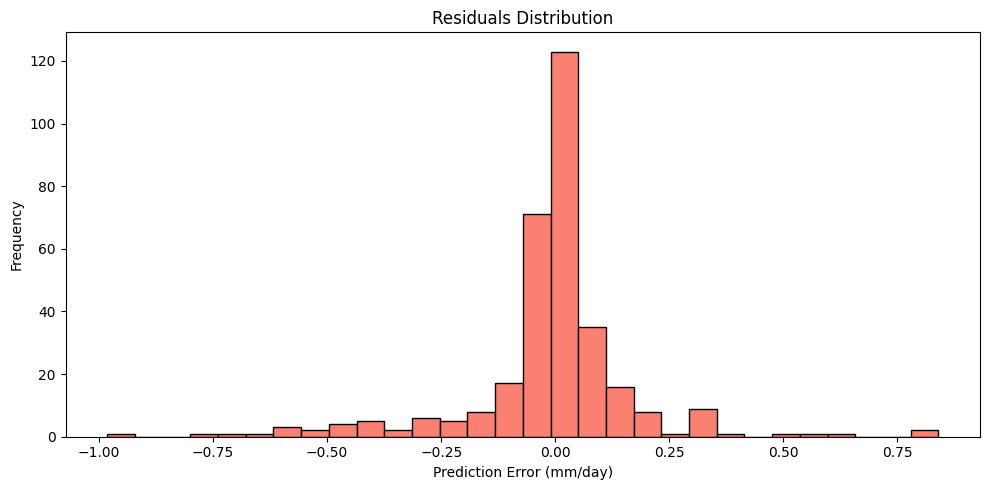

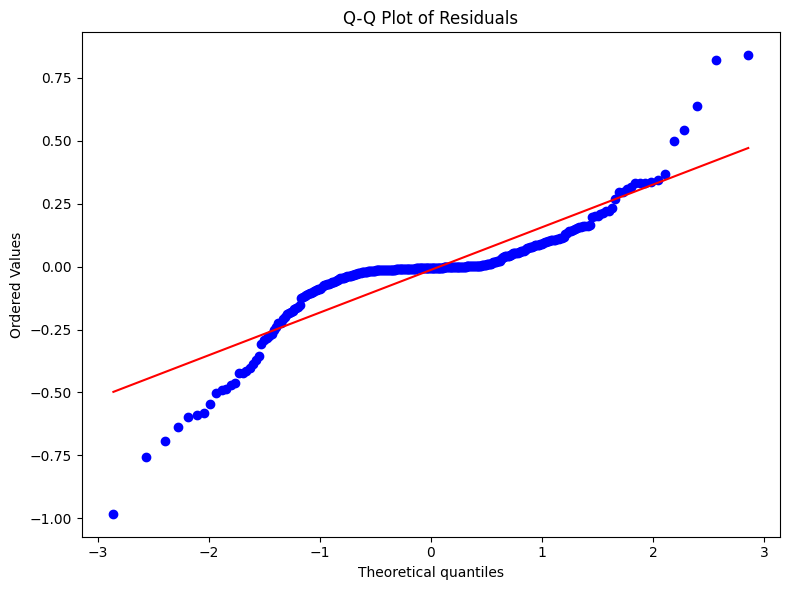

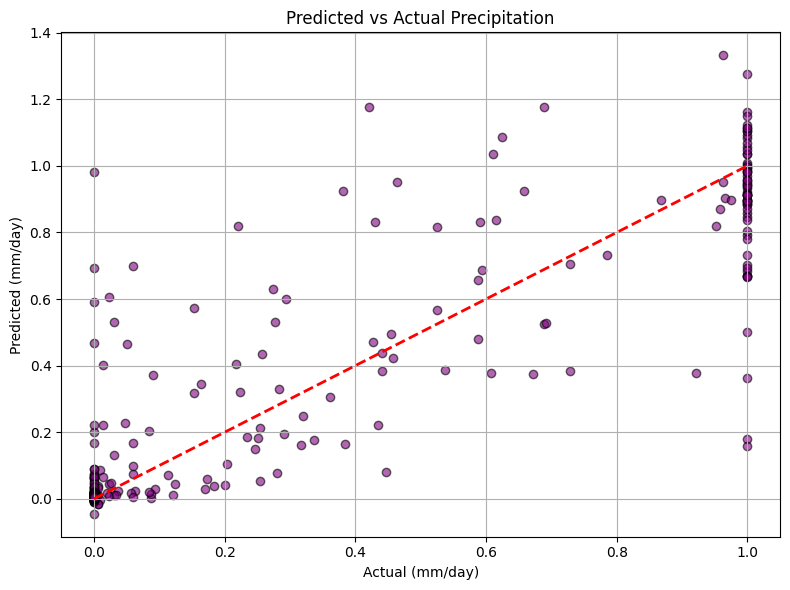

Model and scaler saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error, median_absolute_error,
    explained_variance_score, mean_squared_log_error, max_error
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib
import scipy.stats as stats

# --- Preprocessing ---
df.columns = df.columns.str.replace('©', '(C)', regex=False).str.strip()
df['MO_sin'] = np.sin(2 * np.pi * df['MO'] / 12)
df['MO_cos'] = np.cos(2 * np.pi * df['MO'] / 12)
df['Temp_Dew_Spread'] = df['Temperature at 2 Meters (C)'] - df['Dew/Frost Point at 2 Meters (C)']
df['Humidity_Temp_Interaction'] = df['Relative Humidity at 2 Meters (%)'] * df['Temperature at 2 Meters (C)']
df['log_precipitation'] = np.log1p(df['Precipitation Corrected (mm/day)'])
df['precip_lag1'] = df['log_precipitation'].shift(1)
df['precip_roll3'] = df['log_precipitation'].rolling(3).mean()
df['precip_roll7'] = df['log_precipitation'].rolling(7).mean()
df.dropna(inplace=True)

features = [
    'MO_sin', 'MO_cos',
    'Temperature at 2 Meters (C)', 'Dew/Frost Point at 2 Meters (C)',
    'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)',
    'Wind Speed at 10 Meters', 'Temp_Dew_Spread',
    'Humidity_Temp_Interaction', 'precip_lag1', 'precip_roll3', 'precip_roll7'
]

X = df[features]
y = df['log_precipitation']

# --- Split & Normalize ---
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model ---
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Training ---
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# --- Prediction ---
y_pred_log = model.predict(X_test_scaled).flatten()
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mae = mean_absolute_error(y_test_orig, y_pred)
r2_train = r2_score(np.expm1(y_train), np.expm1(model.predict(X_train_scaled).flatten()))
r2_test = r2_score(y_test_orig, y_pred)
mape = mean_absolute_percentage_error(y_test_orig, y_pred)
filtered_mape = mean_absolute_percentage_error(y_test_orig[y_test_orig > 0.1], y_pred[y_test_orig > 0.1])
smape = 100 * np.mean(2 * np.abs(y_pred - y_test_orig) / (np.abs(y_pred) + np.abs(y_test_orig)))
y_test_clip = np.clip(y_test_orig, 0, None)
y_pred_clip = np.clip(y_pred, 0, None)
msle = mean_squared_log_error(y_test_clip, y_pred_clip)
max_err = max_error(y_test_orig, y_pred)
medae = median_absolute_error(y_test_orig, y_pred)
explained_var = explained_variance_score(y_test_orig, y_pred)

# --- Results ---
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test MAPE (raw): {mape:.4f}")
print(f"Test MAPE (filtered): {filtered_mape:.4f}")
print(f"SMAPE: {smape:.4f}")
print(f"MSLE: {msle:.4f}")
print(f"Max Error: {max_err:.4f}")
print(f"Test Median AE: {medae:.4f}")
print(f"Explained Variance Score: {explained_var:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

# --- Plots ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_test_orig.values, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.75)
plt.title('Actual vs Predicted Precipitation')
plt.xlabel('Index')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.tight_layout()
plt.show()

metrics = {
    "RMSE": rmse,
    "MAE": mae,
    "MAPE (filtered)": filtered_mape,
    "SMAPE": smape,
    "MSLE": msle,
    "Max Error": max_err,
    "Median AE": medae,
    "Explained Var": explained_var,
    "R2 Test": r2_test,
    "R2 Train": r2_train
}

plt.figure(figsize=(12, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("Evaluation Metrics (Deep Learning)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

residuals = y_test_orig - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, color='salmon', edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error (mm/day)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.6, color='purple', edgecolor='k')
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Precipitation')
plt.xlabel('Actual (mm/day)')
plt.ylabel('Predicted (mm/day)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Save model and scaler for Streamlit ---
model.save("mlp_weather_model.h5")
joblib.dump(scaler, "scaler.save")
print("Model and scaler saved successfully.")
from google.colab import files
files.download("mlp_weather_model.h5")
files.download("scaler.save")


In [33]:
testing

NameError: name 'testing' is not defined